Task1_0726. 신용카드 사기 검출 모델을 아래와 같이 생성하고 평가하세요.

- 데이터 일차 가공 및 모델 학습/예측/평가
  - Time 컬럼 삭제, 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가

- Amount 컬럼 데이터 분포도 변환 후 모델 학습/예측/평가
  - 표준화한 후 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가

- 이상치 데이터 제거 후 모델 학습/예측/평가
  - 데이터의 상관관계를 시각화 V14와 클래스의 상관관계 높음을 확인 후 V14 컬럼의 이상치 제거한 후 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가

- SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
  - 불균형한 데이터셋 처리를 위한 imbalanced-learn 라이브러리를 설치
  - %pip install imbalanced-learn
  - SMOTE(Synthetic Minority Over-sampling Technique)를 사용하여 불균형한 데이터셋을 처리
  - from imblearn.over_sampling import SMOTE
  - smote = SMOTE(random_state=0)
  - X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
  - SMOTE를 적용한 학습 데이터셋을 사용하여 로지스틱 회귀 모델을 학습하고 예측 성능을 평가
  - Precision-Recall 커브를 시각화하는 함수
  - LightGBM을 이용하여 모델링 및 평가

In [18]:
#data load
import pandas as pd

file_path = r"D:\kdt_240424\workspace\M5_ML\data\creditcard.csv"
data = pd.read_csv(file_path)

In [19]:
# Time 컬럼 삭제

data.drop('Time', axis= 1, inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [23]:
# 로지스틱 회귀

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



lr = LogisticRegression(solver='lbfgs',max_iter=1000, random_state=42)

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:,-1]


def get_clf_eval(y_test=None, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("오차 행렬:\n", confusion)
    print(
        "정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}".format(
            accuracy, precision, recall, f1, roc_auc
        )
    )

get_clf_eval(y_test, pred, pred_proba)

오차 행렬:
 [[85294    13]
 [   50    86]]
정확도: 0.9993, 정밀도: 0.8687, 재현율: 0.6324,    F1: 0.7319, AUC:0.9812


In [24]:
# LightGBM을 이용하여 모델링 및 평가

from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=100, learning_rate=0.1)
lgbm_wrapper.fit(X_train, y_train)
pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬:
 [[85267    40]
 [   29   107]]
정확도: 0.9992, 정밀도: 0.7279, 재현율: 0.7868,    F1: 0.7562, AUC:0.9496


- Amount 컬럼 데이터 분포도 변환 후 모델 학습/예측/평가
  - 표준화한 후 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가

In [25]:
# 표준화 로지스틱 회귀
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:, -1]


def get_clf_eval(y_test=None, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("오차 행렬:\n", confusion)
    print(
        "정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}".format(
            accuracy, precision, recall, f1, roc_auc
        )
    )


get_clf_eval(y_test, pred, pred_proba)

오차 행렬:
 [[85295    12]
 [   51    85]]
정확도: 0.9993, 정밀도: 0.8763, 재현율: 0.6250,    F1: 0.7296, AUC:0.9812


In [26]:
# 표준화한 후 LightGBM을 이용하여 모델링 및 평가

from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=100, learning_rate=0.1)
lgbm_wrapper.fit(X_train, y_train)
pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬:
 [[84938   369]
 [   46    90]]
정확도: 0.9951, 정밀도: 0.1961, 재현율: 0.6618,    F1: 0.3025, AUC:0.7734


- 이상치 데이터 제거 후 모델 학습/예측/평가
  - 데이터의 상관관계를 시각화 V14와 클래스의 상관관계 높음을 확인 후 V14 컬럼의 이상치 제거한 후 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가

In [27]:
# 이상치 데이터 제거

data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [29]:
data[data['Amount']>10000].value_counts

<bound method DataFrame.value_counts of                V1         V2         V3         V4          V5         V6  \
46841  -23.712839 -42.172688 -13.320825   9.925019  -13.945538   5.564891   
54018  -21.780665 -38.305310 -12.122469   9.752791  -12.880794   4.256017   
58465  -36.802320 -63.344698 -20.645794  16.715537  -20.672064   7.694002   
151296 -34.549296 -60.464618 -21.340854  16.875344  -19.229075   6.335259   
169457 -20.924897 -37.943452 -14.060281  10.473005  -10.866639   6.256654   
274771 -35.548539 -31.850484 -48.325589  15.304184 -113.743307  73.301626   
284249  -9.030538 -11.112584 -16.233798   3.592021  -40.427726  23.917837   

                V7         V8        V9        V10  ...        V21        V22  \
46841    15.710644  -2.844253 -1.580725  -5.533256  ...   7.921600  -6.320710   
54018    14.785051  -2.818253 -0.667338  -5.545590  ...   7.437478  -5.619439   
58465    24.956587  -4.730111 -2.687312  -8.423404  ...  11.455313 -10.933144   
151296   24.422716 

In [30]:
data[data["Amount"] > 5000].value_counts

<bound method DataFrame.value_counts of                V1         V2         V3         V4          V5         V6  \
1632   -11.140706  -9.612726 -12.389545   6.013346  -32.092129  21.393069   
15835  -10.410270 -19.917165  -6.833829   4.398751   -6.914945   0.953082   
18570   -5.715306  -0.094700  -7.856475   2.259661  -23.611865  16.493227   
19760  -14.191832 -25.313252  -7.578781   7.730844   -8.285413   3.994474   
23128  -23.383129 -18.098804 -20.195367   4.249104  -42.147898  22.529298   
37000  -14.711825 -23.250844  -7.631400   5.975826  -15.615302   8.060516   
44513  -11.839743 -17.711661  -6.893572   4.385610  -18.883164  10.857248   
46841  -23.712839 -42.172688 -13.320825   9.925019  -13.945538   5.564891   
47299  -12.008347 -17.860112  -4.743411   0.810574  -10.726424   5.766249   
48529  -12.618406 -16.550248  -7.779531   2.245844   -7.609465   3.514395   
49406   -9.471686 -18.793329  -7.859680   2.904124   -3.906569   5.203612   
54018  -21.780665 -38.305310 -12.122

In [32]:
# 5000달러 이상이 55 건 밖에 안되므로 5000초과 제거

data = data[data['Amount']< 5000]

In [33]:
data[data["Amount"] >= 5000]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [34]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


lr = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:, -1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬:
 [[85255    14]
 [   58    99]]
정확도: 0.9992, 정밀도: 0.8761, 재현율: 0.6306,    F1: 0.7333, AUC:0.9673


<Axes: >

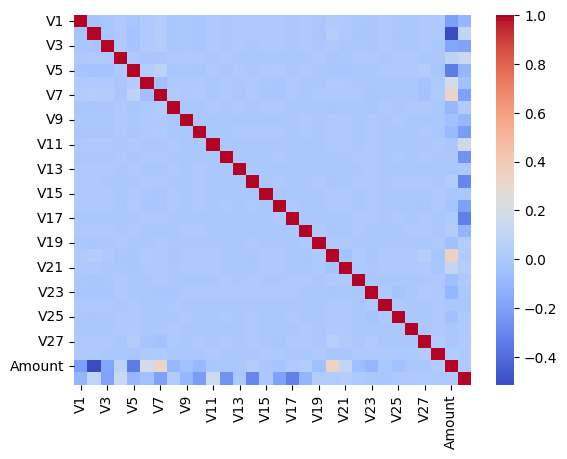

In [36]:
#데이터의 상관관계를 시각화

import seaborn as sns

sns.heatmap(data.corr(),  cmap='coolwarm')

In [38]:
# V14 컬럼의 이상치 제거한 후 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가

data['V14'].describe()

count    284752.000000
mean         -0.000156
std           0.958198
min         -19.214325
25%          -0.425601
50%           0.050504
75%           0.492982
max          10.526766
Name: V14, dtype: float64

In [41]:
data[data['V14']< -10]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6331,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6717,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,-3.796354,-7.454841,...,0.615642,-0.406427,-0.737018,-0.279642,1.106766,0.323885,0.894767,0.569519,1.00,1
6719,-0.251471,4.313523,-6.891438,6.796797,0.616297,-2.966327,-2.436653,0.489328,-3.371639,-6.810813,...,0.536892,-0.546126,-0.605240,-0.263743,1.539916,0.523574,0.891025,0.572741,1.00,1
6899,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,-7.191604,...,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252774,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,-5.533443,...,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,0.77,1
255556,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,-4.128505,-3.963224,...,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,0.77,1
262560,0.567539,3.309385,-6.631268,6.394574,-0.054172,-2.396535,-2.792489,0.514811,-3.541780,-5.334754,...,0.614221,-0.365047,-0.180409,-0.523271,0.645054,0.246466,0.902675,0.473571,4.69,1
262826,-0.417340,4.700055,-7.521767,7.671884,0.260821,-2.646693,-2.854432,0.958783,-4.588536,-6.120715,...,0.622200,-0.437708,-0.090358,-0.742802,-0.312361,0.502575,0.821390,0.372379,0.77,1


In [42]:
data = data[data["V14"] >= -10]

In [43]:
data['V14'].describe()

count    284616.000000
mean          0.005932
std           0.915884
min          -9.982585
25%          -0.424644
50%           0.050941
75%           0.493247
max          10.526766
Name: V14, dtype: float64

In [44]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


lr = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:, -1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬:
 [[85261     6]
 [   37    81]]
정확도: 0.9995, 정밀도: 0.9310, 재현율: 0.6864,    F1: 0.7902, AUC:0.9632


In [45]:
# LightGBM을 이용하여 모델링 및 평가

from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=100, learning_rate=0.1)
lgbm_wrapper.fit(X_train, y_train)
pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬:
 [[84734   533]
 [   77    41]]
정확도: 0.9929, 정밀도: 0.0714, 재현율: 0.3475,    F1: 0.1185, AUC:0.5172


- SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
  - 불균형한 데이터셋 처리를 위한 imbalanced-learn 라이브러리를 설치
  - %pip install imbalanced-learn
  - SMOTE(Synthetic Minority Over-sampling Technique)를 사용하여 불균형한 데이터셋을 처리
  - from imblearn.over_sampling import SMOTE
  - smote = SMOTE(random_state=0)
  - X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
  - SMOTE를 적용한 학습 데이터셋을 사용하여 로지스틱 회귀 모델을 학습하고 예측 성능을 평가
  - Precision-Recall 커브를 시각화하는 함수
  - LightGBM을 이용하여 모델링 및 평가

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

lr = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)

lr.fit(X_train_over, y_train_over)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:, -1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬:
 [[83158  2109]
 [   16   102]]
정확도: 0.9751, 정밀도: 0.0461, 재현율: 0.8644,    F1: 0.0876, AUC:0.9635


[np.float64(2.458287444780354e-52), np.float64(3.664322821767515e-51), np.float64(3.449585958406441e-47), np.float64(5.2806106448248575e-45), np.float64(2.635088785615988e-37), np.float64(8.507032352979205e-35), np.float64(5.747885352359559e-33), np.float64(1.0950720718776913e-32), np.float64(1.094578009423845e-31), np.float64(3.7926000803772877e-31), np.float64(4.275927972789461e-31), np.float64(5.793768833321765e-30), np.float64(8.396423188801896e-30), np.float64(1.3133967454358156e-29), np.float64(3.8745172961174236e-29), np.float64(4.839831359261189e-29), np.float64(8.822257327236635e-29), np.float64(9.406467197643054e-29), np.float64(1.0475252264558908e-28), np.float64(1.1898649256228505e-28), np.float64(1.5758260240801604e-28), np.float64(2.6437154097504914e-28), np.float64(3.0192427211032435e-28), np.float64(4.509561120713214e-28), np.float64(5.836387797838647e-28), np.float64(5.950331099019224e-28), np.float64(6.63299848328735e-28), np.float64(7.896008294061905e-28), np.float64

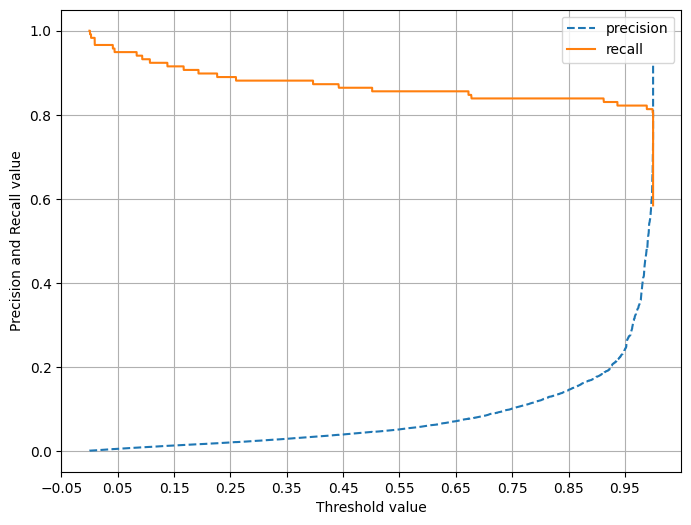

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
import numpy as np

def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    print(list(thresholds))
    print(thresholds.shape)
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    print(threshold_boundary)
    # x축을 threshold값으로, y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로
    plt.plot(
        thresholds, precisions[0:threshold_boundary], linestyle="--", label="precision"
    )
    plt.plot(thresholds, recalls[0:threshold_boundary], label="recall")

    # threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()  # x축 현재 한계를 반환
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall value")
    plt.legend()
    plt.grid()
    plt.show()


precision_recall_curve_plot(y_test, pred_proba)

In [49]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=100, learning_rate=0.1)
lgbm_wrapper.fit(X_train_over, y_train_over)
pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬:
 [[85192    75]
 [   21    97]]
정확도: 0.9989, 정밀도: 0.5640, 재현율: 0.8220,    F1: 0.6690, AUC:0.9536


## ex


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/content/drive")


card_df = pd.read_csv(
    "/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/creditcard.csv"
)
card_df.head(3)

In [1]:
# data load
import pandas as pd

file_path = r"D:\kdt_240424\workspace\M5_ML\data\creditcard.csv"
card_df = pd.read_csv(file_path)

In [2]:
from sklearn.model_selection import train_test_split


# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop("Time", axis=1, inplace=True)
    return df_copy

In [3]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
# 데이터를 전처리하는 get_preprocessed_df 함수
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X_features, y_target, test_size=0.3, random_state=0, stratify=y_target
    )
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [4]:
y_train.value_counts()

Class
0    199020
1       344
Name: count, dtype: int64

In [5]:
print("학습 데이터 레이블 값 비율")
print(y_train.value_counts() / y_train.shape[0] * 100)
print("테스트 데이터 레이블 값 비율")
print(y_test.value_counts() / y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [6]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.metrics import roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("오차 행렬")
    print(confusion)
    # ROC-AUC print 추가
    print(
        "정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}".format(
            accuracy, precision, recall, f1, roc_auc
        )
    )

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr_clf = LogisticRegression(max_iter=100, solver="lbfgs", random_state=42)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행.
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85281    14]
 [   59    89]]
정확도: 0.9991, 정밀도: 0.8641, 재현율: 0.6014,    F1: 0.7092, AUC:0.9762


In [8]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(
    model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None
):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [9]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False
)
get_model_train_eval(
    lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test
)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014771 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

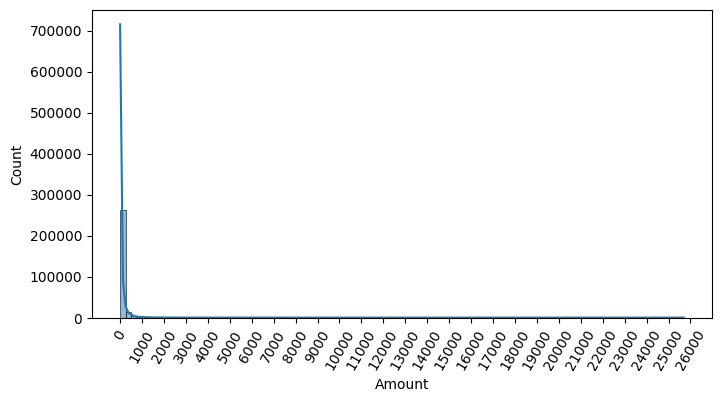

In [11]:
# 신용카드 거래 금액('Amount')의 히스토그램을 생성
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df["Amount"], bins=100, kde=True)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler


# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy["Amount"].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, "Amount_Scaled", amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(["Time", "Amount"], axis=1, inplace=True)
    return df_copy

In [18]:
# np.log1p 함수를 사용하여 'Amount' 피처를 로그 변환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환
    amount_n = np.log1p(df_copy["Amount"])
    df_copy.insert(0, "Amount_Scaled", amount_n)
    df_copy.drop(["Time", "Amount"], axis=1, inplace=True)
    return df_copy

In [ ]:
# 이 셀에서는 로그 변환된 'Amount' 피처를 사용하여 로지스틱 회귀와 LightGBM 모델을 다시 학습하고 예측 성능을 평가
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### 로지스틱 회귀 예측 성능 ###")
get_model_train_eval(
    lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test
)

print("### LightGBM 예측 성능 ###")
get_model_train_eval(
    lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test
)

In [13]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행.
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### 로지스틱 회귀 예측 성능 ###")
lr_clf = LogisticRegression()
get_model_train_eval(
    lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test
)

print("### LightGBM 예측 성능 ###")
lgbm_clf = LGBMClassifier(
    n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False
)
get_model_train_eval(
    lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test
)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8692, 재현율: 0.6284,    F1: 0.7294, AUC:0.9706
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

<Axes: >

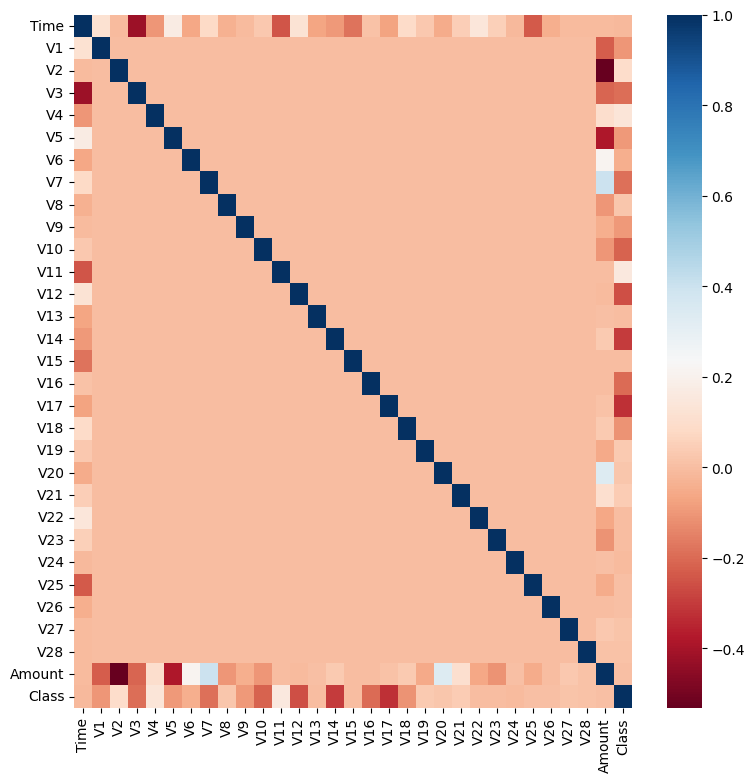

In [14]:
# 데이터의 상관 관계를 시각화 : v14, v17이 class와 상관관계가 높음
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap="RdBu")

In [15]:
# 데이터에서 이상치를 찾는 get_outlier 함수를 정의
import numpy as np


def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
    fraud = df[df["Class"] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환.
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [16]:
# get_outlier 함수를 호출하여 'V14' 피처의 이상치 인덱스를 찾고, 이를 출력
outlier_index = get_outlier(df=card_df, column="V14", weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


In [17]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy["Amount"])
    df_copy.insert(0, "Amount_Scaled", amount_n)
    df_copy.drop(["Time", "Amount"], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column="V14", weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy


X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print("### 로지스틱 회귀 예측 성능 ###")
get_model_train_eval(
    lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test
)
print("### LightGBM 예측 성능 ###")
get_model_train_eval(
    lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test
)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8673, 재현율: 0.6712,    F1: 0.7568, AUC:0.9725
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [ ]:
# 불균형한 데이터셋 처리를 위한 imbalanced-learn 라이브러리를 설치
! pip install imbalanced-learn

In [19]:
# SMOTE(Synthetic Minority Over-sampling Technique)를 사용하여 불균형한 데이터셋을 처리
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ", X_train.shape, y_train.shape)
print(
    "SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ",
    X_train_over.shape,
    y_train_over.shape,
)
print("SMOTE 적용 후 레이블 값 분포: \n", pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 Class
0    199020
1    199020
Name: count, dtype: int64


In [20]:
# Precision-Recall 커브를 시각화하는 함수

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve


def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(
        thresholds, precisions[0:threshold_boundary], linestyle="--", label="precision"
    )
    plt.plot(thresholds, recalls[0:threshold_boundary], label="recall")

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall value")
    plt.legend()
    plt.grid()
    plt.show()

SMOTE(Synthetic Minority Over-sampling Technique)를 적용한 후에 정밀도가 낮고 재현율이 높은 문제가 발생할 수 있습니다. SMOTE는 소수 클래스 데이터를 인위적으로 생성하여 클래스 불균형을 해결하는 기법입니다. 그러나 이로 인해 모델이 양성(Positive) 클래스를 과도하게 예측하게 되는 경우가 생길 수 있습니다. 이는 많은 거짓 양성(False Positive)을 초래할 수 있으며, 결과적으로 정밀도가 낮아질 수 있습니다.

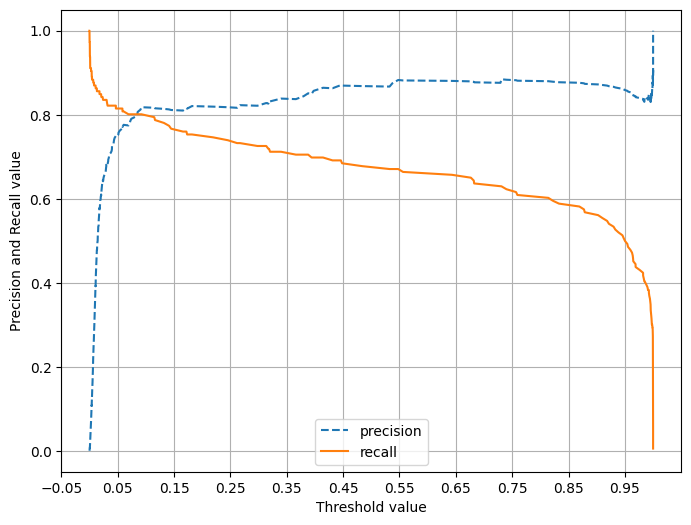

In [21]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

LightGBM이 SMOTE로 증강된 데이터를 사용하여 모델링할 때 정밀도가 정상이 되는 이유는 다음과 같습니다:
- LightGBM의 강력한 성능: 데이터 처리와 피처 중요도를 잘 반영하는 학습 방식.
- SMOTE와 LightGBM의 시너지 효과: 클래스 불균형 문제를 해결하여 균형 잡힌 모델 학습.
- 모델 튜닝 및 하이퍼파라미터 최적화: 적절한 하이퍼파라미터 설정을 통해 모델 성능 향상

결론:

좋은 로데이터 수집

전처리 

데이터에 맞는 모델을 사용

파라미터 튜닝

적합한 평가 방법 선택

거기에서 나온 인사이트를 과제에 적용

In [22]:
lgbm_clf = LGBMClassifier(
    n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False
)
get_model_train_eval(
    lgbm_clf,
    ftr_train=X_train_over,
    ftr_test=X_test,
    tgt_train=y_train_over,
    tgt_test=y_test,
)

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split